# <b>Lead Scoring Case Study</b>

## <b>Problem Statement</b><br>
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

## <b>Data</b><br>
You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted.

## <b>Business Objective</b><br>
The company requires you to build a model wherein you need to assign a "lead score" to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## The overall process can be outlined as follows: 
1. Read and understand the data
2. Clean the data
3. Data visualization
4. Prepare the data for Model Building
5. Model Building
6. Model Evaluation
7. Plotting the ROC Curve
8. Finding Optimal Cutoff Point
9. Model Evaluation
10. Making Predictions on the Test Set

In [1]:
# Supressing warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Step 1: Reading and understanding the data

In [3]:
# Setting the max column wiidth to display to 50
pd.options.display.max_columns = 50

# Importing the dataset to "lead_data" dataframe
lead_data = pd.read_csv("Leads.csv")
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# Checking the shape of data
lead_data.shape

(9240, 37)

There are 9240 rows and 37 columns in the dataset.

In [5]:
# Checking info of the data
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

The data types of all the columns are in correct format & There are some missing values present in the data.

In [6]:
# Describing the data
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# checking number of unique values in each column
lead_data.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

## Step 2: Data cleaning

<b>Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value.</b>

In [8]:
# Replacing 'Select' value of the dataframe to null
lead_data = lead_data.replace('Select', np.nan)

In [9]:
# Checking percentage null values of all columns
round((lead_data.isna().sum()/len(lead_data.index)*100),2).sort_values(ascending=False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

### Handling missing values

<b>Removing missing data columns with missing values more than 35%</b>

As per standard we can drop a column with missing data more than 30-50%

In [10]:
# function to drop columns and know the shape before and after dropping

def dropNullColumns(data ,percentage=35):
    
    missing_perc = 100*(data.isna().mean()).sort_values(ascending=False)
    col_to_drop = missing_perc[missing_perc>=percentage].index.to_list()
    print("Total columns dropped: ",len(col_to_drop),"\n")
    print("List of columns dropped : " , col_to_drop,"\n")
    print("Shape before dropping columns: ",data.shape)
    
    data.drop(labels=col_to_drop,axis=1, inplace=True)
    
    print("Shape after dropping columns: ",data.shape)

In [11]:
# Dropping columns using the above defined function
dropNullColumns(lead_data)

Total columns dropped:  10 

List of columns dropped :  ['How did you hear about X Education', 'Lead Profile', 'Lead Quality', 'Asymmetrique Profile Score', 'Asymmetrique Activity Score', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'City', 'Specialization', 'Tags'] 

Shape before dropping columns:  (9240, 37)
Shape after dropping columns:  (9240, 27)


In [12]:
# Check for duplicate rows
print(lead_data.duplicated().sum())

0


There are no duplicates present in the dataset.

In [13]:
# Checking percentage null values of all columns again
round((lead_data.isna().sum()/len(lead_data.index)*100),2).sort_values(ascending=False)

What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
X Education Forums                                0.00
A free copy of Mastering The Interview            0.00
I agree to pay the amount through cheque          0.00
Get updates on DM Content                         0.00
Update me on Supply Chain Content                 0.00
Receive More Updates About Our Courses            0.00
Through Recommendations                           0.00
Digital Advertisement                             0.00
Newspaper                                         0.00
Prospect ID                                       0.00
Newspaper Article                                 0.00
Magazine  

#### Fixing the missing values in the column 'What matters most to you in choosing a course'

This column has almost 29% missing values.

In [14]:
# Checking the percentage of value counts of 'What matters most to you in choosing a course' column.

lead_data['What matters most to you in choosing a course'].value_counts(normalize=True)*100

Better Career Prospects      99.954065
Flexibility & Convenience     0.030623
Other                         0.015312
Name: What matters most to you in choosing a course, dtype: float64

Since 'What matters most to you in choosing a course' column is highly skewed, so dropping this column.

In [15]:
# Dropping 'What matters most to you in choosing a course' column
lead_data = lead_data.drop(columns='What matters most to you in choosing a course', axis=1)

#### Fixing the missing values in 'What is your current occupation' column.

This column has around 29% missing values.

In [16]:
# Checking the percentage of value counts of 'What is your current occupation' column.

lead_data['What is your current occupation'].value_counts(normalize=True)*100

Unemployed              85.496183
Working Professional    10.778626
Student                  3.206107
Other                    0.244275
Housewife                0.152672
Businessman              0.122137
Name: What is your current occupation, dtype: float64

Since no information has been provided Current Occupation, adding a new category 'No Information' and set that 
as value for the null columns

In [17]:
# Imputing missing values in 'What is your current occupation' column with 'No Information'
lead_data['What is your current occupation'] = lead_data['What is your current occupation'].replace(np.nan, 'No Information')

#### Fixing the missing values of 'Country' column.

'Country' column has around 27% missing values.

In [18]:
# Checking the percentage of value counts of 'Country' column.

lead_data['Country'].value_counts(normalize=True)*100

India                   95.766337
United States            1.017849
United Arab Emirates     0.781826
Singapore                0.354035
Saudi Arabia             0.309780
United Kingdom           0.221272
Australia                0.191769
Qatar                    0.147514
Hong Kong                0.103260
Bahrain                  0.103260
Oman                     0.088509
France                   0.088509
unknown                  0.073757
South Africa             0.059006
Nigeria                  0.059006
Germany                  0.059006
Kuwait                   0.059006
Canada                   0.059006
Sweden                   0.044254
China                    0.029503
Asia/Pacific Region      0.029503
Uganda                   0.029503
Bangladesh               0.029503
Italy                    0.029503
Belgium                  0.029503
Netherlands              0.029503
Ghana                    0.029503
Philippines              0.029503
Russia                   0.014751
Switzerland   

As 'Country' column is highly skewed with almost 96% values as 'India', hence dropping this column.

In [19]:
# Dropping the column 'Country'

lead_data = lead_data.drop(columns='Country', axis=1)

In [20]:
# Checking percentage null values of all columns again
round((lead_data.isna().sum()/len(lead_data.index)*100),2).sort_values(ascending=False)

TotalVisits                                 1.48
Page Views Per Visit                        1.48
Last Activity                               1.11
Lead Source                                 0.39
Prospect ID                                 0.00
X Education Forums                          0.00
A free copy of Mastering The Interview      0.00
I agree to pay the amount through cheque    0.00
Get updates on DM Content                   0.00
Update me on Supply Chain Content           0.00
Receive More Updates About Our Courses      0.00
Through Recommendations                     0.00
Digital Advertisement                       0.00
Newspaper                                   0.00
Search                                      0.00
Newspaper Article                           0.00
Magazine                                    0.00
Lead Number                                 0.00
What is your current occupation             0.00
Total Time Spent on Website                 0.00
Converted           

Since the remaining columns with missing values are less that 2%, hence dropping these rows.

In [21]:
# Dropping the rows containing null values

lead_data.dropna(inplace=True, axis=0)

In [22]:
lead_data.shape

(9074, 25)

In [23]:
# Checking percentage null values of all columns again
round((lead_data.isna().sum()/len(lead_data.index)*100),2).sort_values(ascending=False)

Prospect ID                                 0.0
Magazine                                    0.0
A free copy of Mastering The Interview      0.0
I agree to pay the amount through cheque    0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
X Education Forums                          0.0
Newspaper Article                           0.0
Search                                      0.0
Lead Number                                 0.0
What is your current occupation             0.0
Last Activity                               0.0
Page Views Per Visit                        0.0
Total Time Spent on Website                 0.0
TotalVisits                                 0.0
Converted                                   0.0
Do Not Call                             

Now there no null values present in the data.

After fixing all the null values we have 9074 rows and 27 columns of data.

In [24]:
# Checking the percentage of data retained
(len(lead_data.index)/9240)*100

98.2034632034632

After cleaning we have retained almost 98.2% of data.

### Outlier Treatment

In [25]:
# Checking outliers at different percentiles 25%, 50%, 75%, 90%, 95%, 99%

lead_data.describe(percentiles=[0.25,0.50,0.75,0.90,0.95,0.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000
mean,617032.619352,0.378554,3.456028,482.887481,2.370151
std,23348.029512,0.485053,4.858802,545.256560,2.160871
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596406.000000,0.000000,1.000000,11.000000,1.000000
50%,615278.500000,0.000000,3.000000,246.000000,2.000000
75%,637176.500000,1.000000,5.000000,922.750000,3.200000
90%,650276.800000,1.000000,7.000000,1373.000000,5.000000
95%,655344.450000,1.000000,10.000000,1557.000000,6.000000
99%,659563.350000,1.000000,17.000000,1839.000000,9.000000


From above, it can be seen that there are outliers present in the columns 'TotalVisits' and 'Page Views Per Visit'.

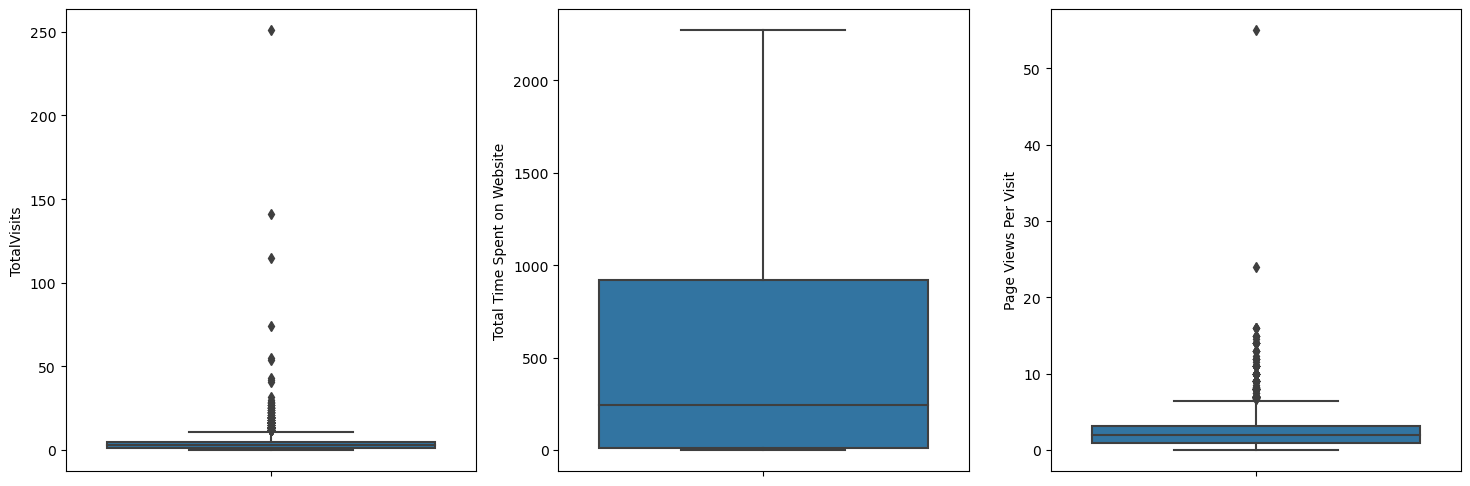

In [26]:
# Plotting boxplot for the above mentioned columns
plt.figure(figsize=(18,6))

# Boxplot for 'TotalVisits' column
plt.subplot(1,3,1)
sns.boxplot(y='TotalVisits', data=lead_data)

# Boxplot for 'Total Time Spent on Website' column
plt.subplot(1,3,2)
sns.boxplot(y='Total Time Spent on Website', data=lead_data)

# Boxplot for 'Page Views Per Visit' column
plt.subplot(1,3,3)
sns.boxplot(y='Page Views Per Visit', data=lead_data)

plt.show()

In [27]:
# Removing values above 99 percentile in 'TotalVisits' column for the sake of better predictability.

lead_data = lead_data[lead_data['TotalVisits'] < lead_data['TotalVisits'].quantile(0.99)]

In [28]:
# Removing values above 99 percentile in 'Page Views Per Visit' column for the sake of better predictability.

lead_data = lead_data[lead_data['Page Views Per Visit'] < lead_data['Page Views Per Visit'].quantile(0.99)]

In [29]:
# Again checking outliers at different percentiles 25%, 50%, 75%, 90%, 95%, 99%

lead_data.describe(percentiles=[0.25,0.50,0.75,0.90,0.95,0.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,8863.000000,8863.000000,8863.000000,8863.000000,8863.000000
mean,617064.374704,0.378089,3.098387,478.122193,2.236941
std,23312.547300,0.484937,2.821961,544.532372,1.835885
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596446.500000,0.000000,1.000000,5.000000,1.000000
50%,615468.000000,0.000000,3.000000,240.000000,2.000000
75%,637152.000000,1.000000,4.000000,913.000000,3.000000
90%,650222.600000,1.000000,7.000000,1371.000000,5.000000
95%,655276.300000,1.000000,8.000000,1553.000000,6.000000
99%,659557.660000,1.000000,13.000000,1837.760000,7.000000


In [30]:
# Checking the percentage of data retained after handling outliers.
(len(lead_data.index)/9240)*100

95.91991341991341

Around 96% of data is retained after handling outliers.

#### Reanaming columns

In [31]:
# Renaming column name to "Free_copy" from "A free copy of Mastering The Interview"

lead_data.rename(columns={'A free copy of Mastering The Interview': 'Free_copy'}, inplace=True)

# Renaming column name to "Current_occupation" from "What is your current occupationA free copy of Mastering The Interview"

lead_data.rename(columns={'What is your current occupation': 'Current_occupation'}, inplace=True)

## Step 3: Data Visualisation

### Exploratory Data Analysis
#### Univariate and Bivariate Analysis

#### Checking Data Imbalanced

- Data is imbalance when one value is present in majority and other is in minority meaning an uneven distribution of observations in dataset
- Data imbalance is in the context of Target variable only
- Target variable is 'Converted' which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted

<b>Converted</b>

Converted is the target variable, which identifies whether a lead is successfully converted or not.

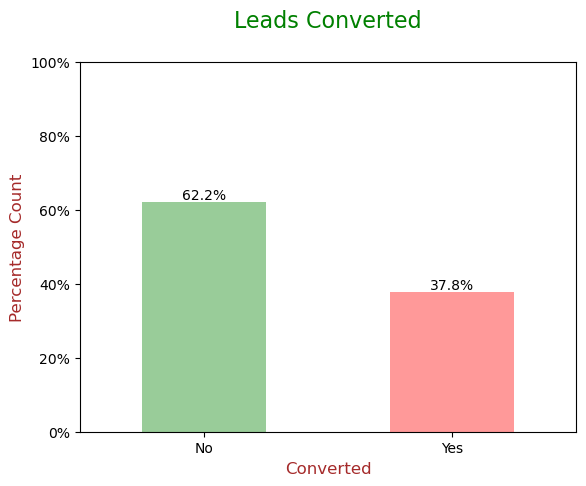

In [32]:
## ploting the results on bar plot

ax=(100*lead_data["Converted"].value_counts(normalize=True)).plot.bar(color=["Green","Red"],alpha=0.4)

# Adding and formatting title
plt.title("Leads Converted\n", fontdict={'fontsize': 16, 'fontweight' : 12, 'color' : 'Green'})


# Labeling Axes
plt.xlabel('Converted', fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("Percentage Count", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})

# modification ticks y axis
ticks=np.arange(0,101,20)
labels=["{:.0f}%".format(i) for i in ticks] 
plt.yticks(ticks,labels)

#xticks
plt.xticks([0,1],["No","Yes"])
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate('{:.1f}%'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
    
plt.show()

The lead conversion rate is almost 38%.

#### 'Lead Origin' column

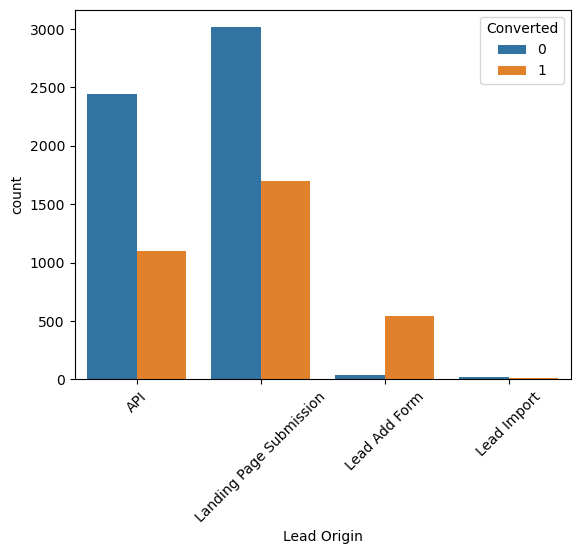

In [33]:
# Visualising the column
sns.countplot(data=lead_data, x='Lead Origin', hue='Converted')
plt.xticks(rotation= 45)
plt.show()

<b>Inference: </b>

- The lead conversion rate for 'API' and 'Landing Page Submission' is almost 40-50%, but the leads generated from them are very high.
- 'Lead Add Form' has comparatively very high conversion rate, but leat generation is very less.
- 'Lead Import' has very low lead generation.

<b>To improve the lead conversion, we need to focus more on lead conversion from 'API' and 'Landing Page Submission' and try generating more leads from 'Lead Add Form'.</b>

#### 'Lead Source' column

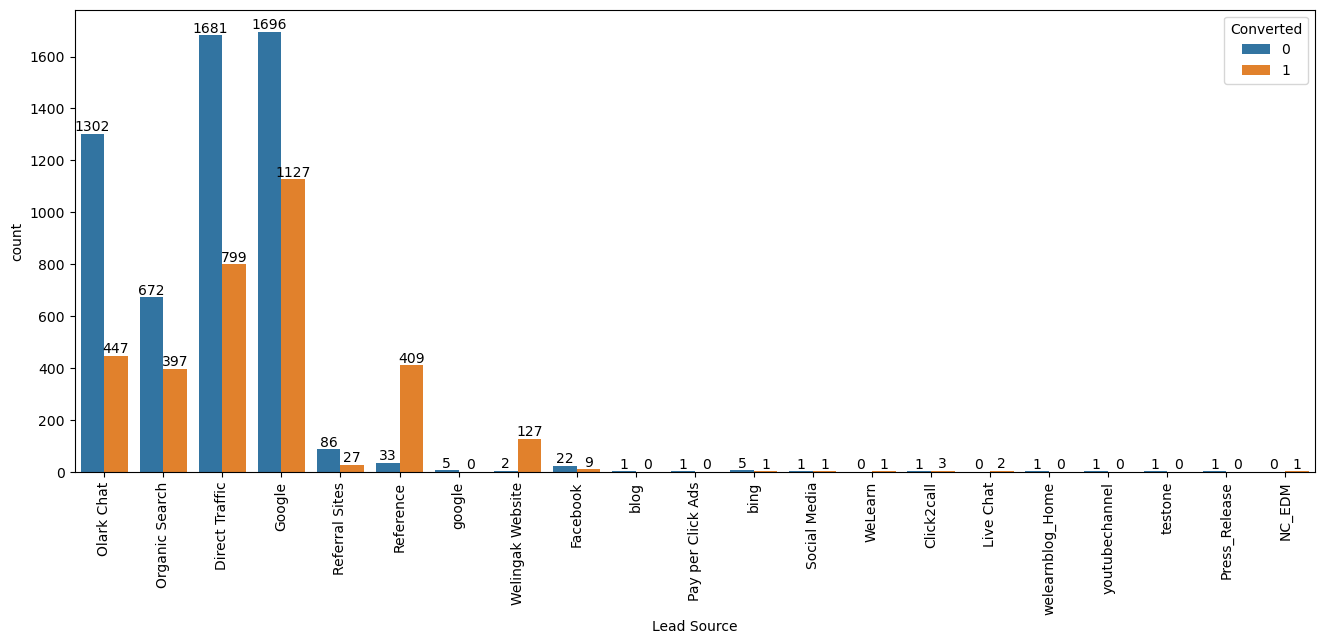

In [34]:
# Visualising the column
plt.figure(figsize=(16,6))
ax = sns.countplot(data=lead_data, x='Lead Source', hue='Converted')
plt.xticks(rotation= 90)
for label in ax.containers:
    ax.bar_label(label)
plt.show()

In [35]:
# There are 'Google' and 'google' categories in this column hence replacing 'google' with 'Google'

lead_data['Lead Source'] = lead_data['Lead Source'].replace('google', 'Google')

In [36]:
# Grouping low frequency value levels to Others
lead_data['Lead Source'] = lead_data['Lead Source'].replace(["bing","Click2call","Press_Release",
                                                           "Social Media","Live Chat","youtubechannel",
                                                           "testone","Pay per Click Ads","welearnblog_Home",
                                                           "WeLearn","blog","NC_EDM"],"Others")

In [37]:
# value_counts percentage after replace
lead_data["Lead Source"].value_counts(normalize=True)*100

Google              31.907932
Direct Traffic      27.981496
Olark Chat          19.733724
Organic Search      12.061379
Reference            4.987025
Welingak Website     1.455489
Referral Sites       1.274963
Facebook             0.349769
Others               0.248223
Name: Lead Source, dtype: float64

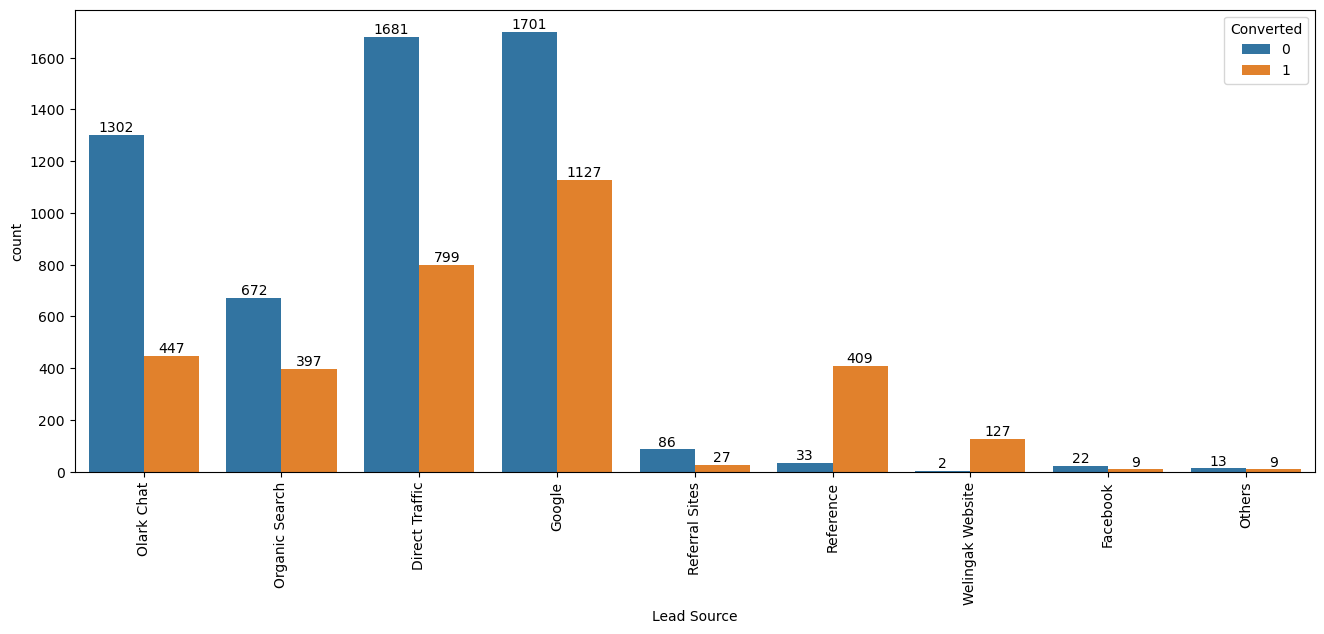

In [38]:
# Visualising the column again
plt.figure(figsize=(16,6))
ax = sns.countplot(data=lead_data, x='Lead Source', hue='Converted')
plt.xticks(rotation= 90)
for label in ax.containers:
    ax.bar_label(label)
plt.show()

Most lead conversion in lead source is from Google.

#### 'Do Not Email' column

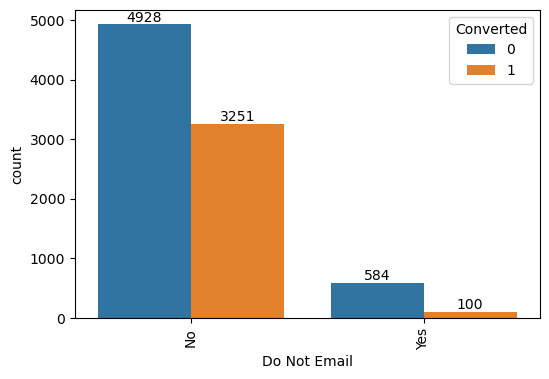

In [39]:
# Visualising the column
plt.figure(figsize=(6,4))
ax=sns.countplot(data=lead_data, x='Do Not Email', hue='Converted')
plt.xticks(rotation= 90)
for label in ax.containers:
    ax.bar_label(label)
plt.show()

Most of the conversion happened when emails were sent.

#### 'Do Not Call' column

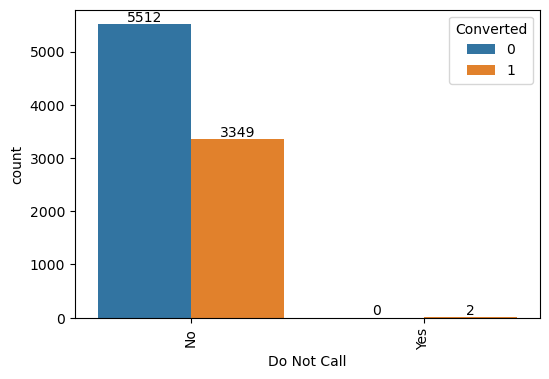

In [40]:
# Visualising the column
plt.figure(figsize=(6,4))
ax=sns.countplot(data=lead_data, x='Do Not Call', hue='Converted')
plt.xticks(rotation= 90)
for label in ax.containers:
    ax.bar_label(label)
plt.show()

From the above graph, it can be seen that almost all the conversions happend when calls were made. However, 2 leads opted for "Do Not Call", but they still got converted.

#### 'Last Activity' column

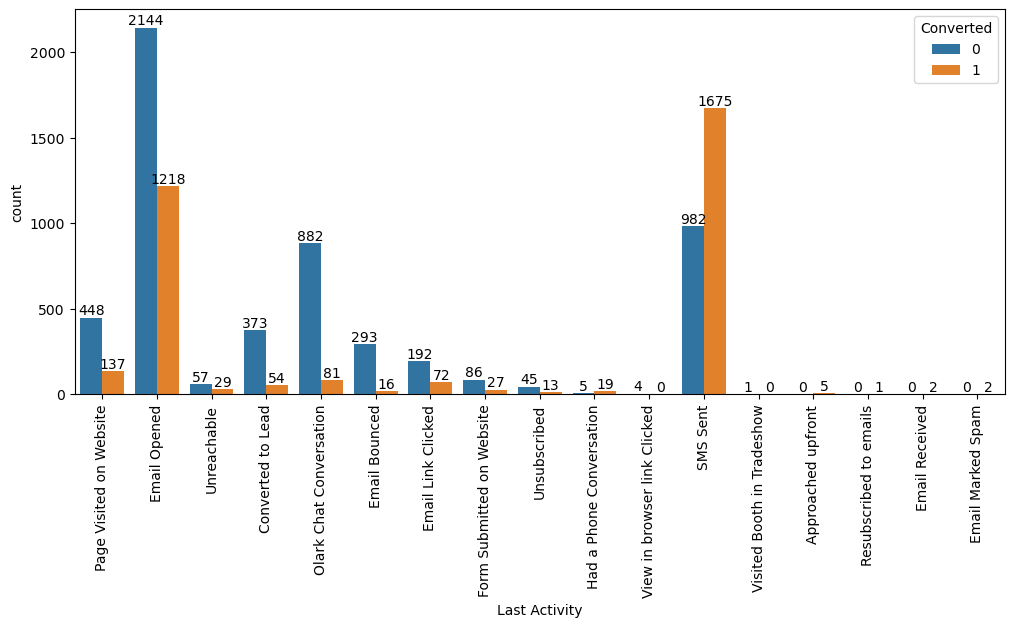

In [41]:
# Visualising the column
plt.figure(figsize=(12,5))
ax=sns.countplot(data=lead_data, x='Last Activity', hue='Converted')
plt.xticks(rotation= 90)
for label in ax.containers:
    ax.bar_label(label)
plt.show()

In [42]:
# Grouping low frequency value levels to Others

lead_data['Last Activity'] = lead_data['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                               'Had a Phone Conversation', 
                                                               'Approached upfront',
                                                               'View in browser link Clicked',       
                                                               'Email Marked Spam',                  
                                                               'Email Received','Visited Booth in Tradeshow',
                                                               'Resubscribed to emails'],'Others')

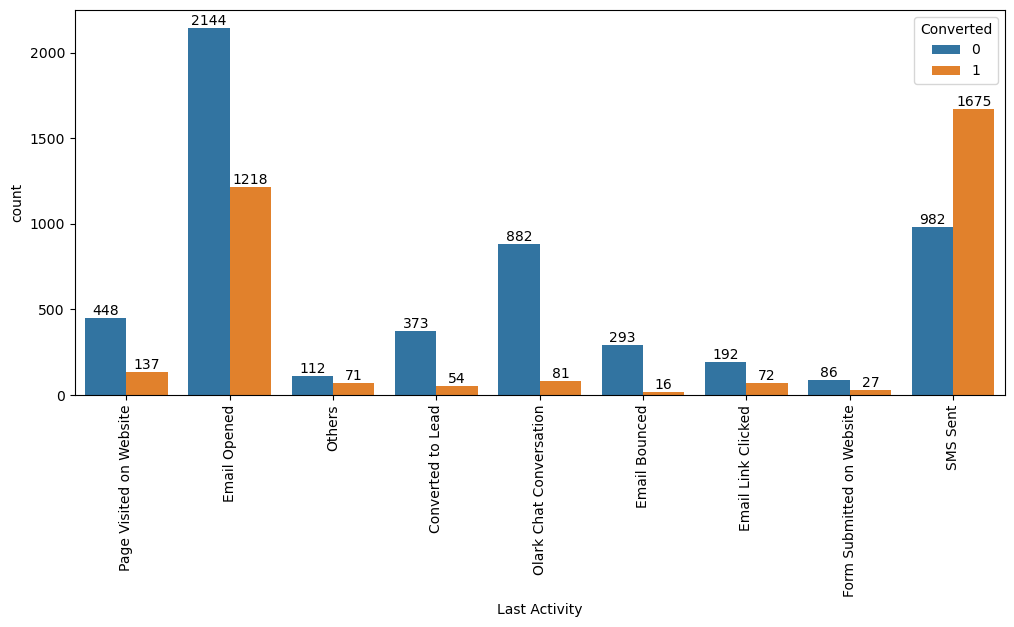

In [43]:
# Visualising the column again
plt.figure(figsize=(12,5))
ax=sns.countplot(data=lead_data, x='Last Activity', hue='Converted')
plt.xticks(rotation= 90)
for label in ax.containers:
    ax.bar_label(label)
plt.show()

Conversion rate is very high for 'SMS Sent'.
Most leads were generated where the last activity was 'Email Opened'.

#### 'Current_occupation' column

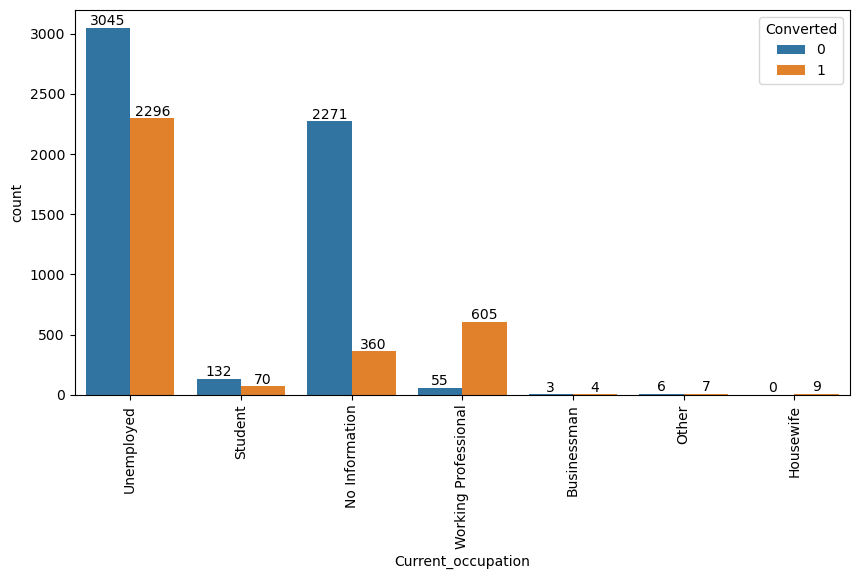

In [44]:
# Visualising the column
plt.figure(figsize=(10,5))
ax=sns.countplot(data=lead_data, x='Current_occupation', hue='Converted')
plt.xticks(rotation= 90)
for label in ax.containers:
    ax.bar_label(label)
plt.show()

- Unemployed leads are very high in number, but the conversion rate is around 40%.
- Working professionals have a very high chance of lead conversion.

#### 'Search' column

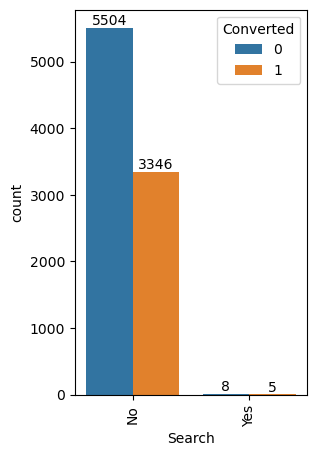

In [45]:
# Visualising the column
plt.figure(figsize=(3,5))
ax=sns.countplot(data=lead_data, x='Search', hue='Converted')
plt.xticks(rotation= 90)
for label in ax.containers:
    ax.bar_label(label)
plt.show()

Conversion rate is high on leads who are not through search.

#### 'Magazine' column

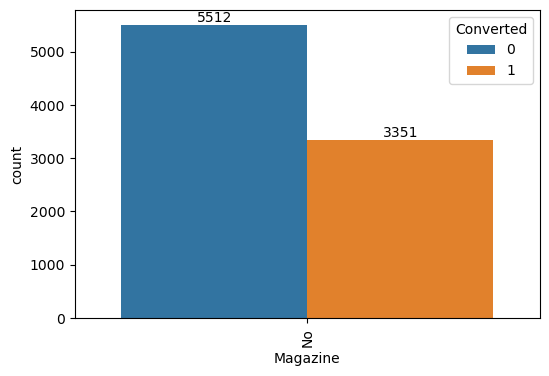

In [46]:
# Visualising the column
plt.figure(figsize=(6,4))
ax=sns.countplot(data=lead_data, x='Magazine', hue='Converted')
plt.xticks(rotation= 90)
for label in ax.containers:
    ax.bar_label(label)
plt.show()

There is only one option is this column, hence it is safe to drop this column.

In [47]:
# Dropping the 'Magazine' column
lead_data = lead_data.drop('Magazine', axis=1)

#### 'Newspaper Article' column

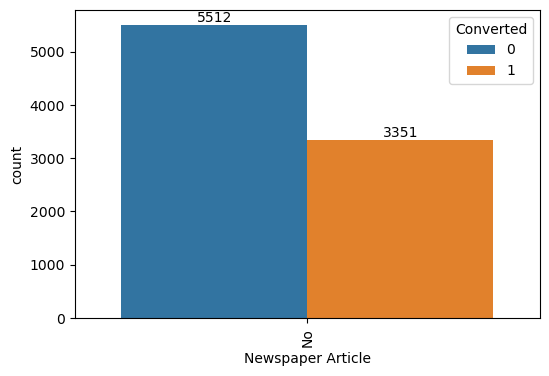

In [48]:
# Visualising the column
plt.figure(figsize=(6,4))
ax=sns.countplot(data=lead_data, x='Newspaper Article', hue='Converted')
plt.xticks(rotation= 90)
for label in ax.containers:
    ax.bar_label(label)
plt.show()

There is only one option is this column, hence it is safe to drop this column.

In [49]:
# Dropping the 'Newspaper Article' column
lead_data = lead_data.drop('Newspaper Article', axis=1)

#### 'X Education Forums' column

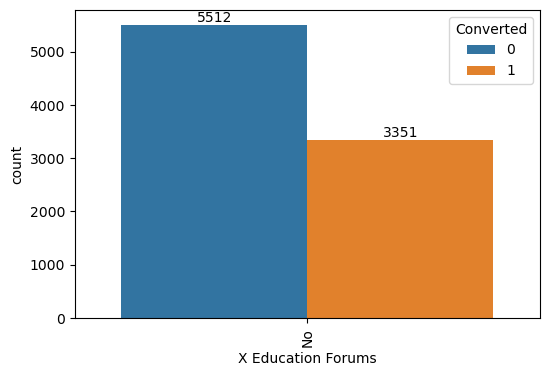

In [50]:
# Visualising the column
plt.figure(figsize=(6,4))
ax=sns.countplot(data=lead_data, x='X Education Forums', hue='Converted')
plt.xticks(rotation= 90)
for label in ax.containers:
    ax.bar_label(label)
plt.show()

There is only one option is this column, hence it is safe to drop this column.

In [51]:
# Dropping the 'X Education Forums' column
lead_data = lead_data.drop('X Education Forums', axis=1)

#### 'Newspaper' column

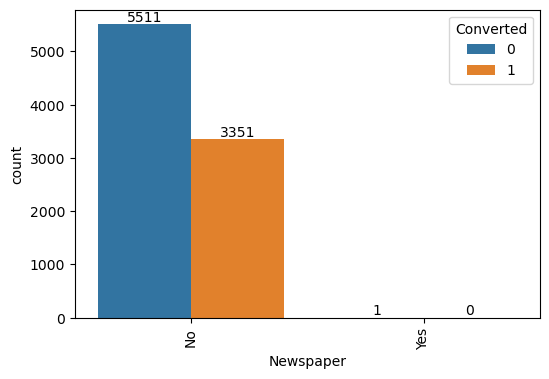

In [52]:
# Visualising the column
plt.figure(figsize=(6,4))
ax=sns.countplot(data=lead_data, x='Newspaper', hue='Converted')
plt.xticks(rotation= 90)
for label in ax.containers:
    ax.bar_label(label)
plt.show()

Newspaper column has very few rows with "Yes" as the value and rest of all the values are "No", hence dropping this column.

In [53]:
# Dropping the 'Newspaper' column
lead_data = lead_data.drop('Newspaper', axis=1)

#### 'Digital Advertisement' column

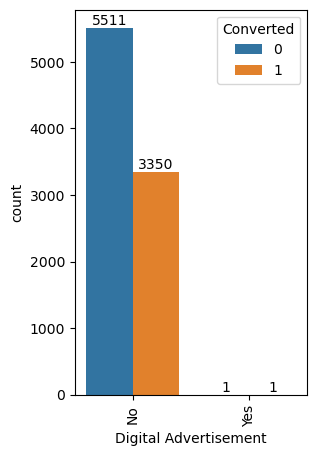

In [54]:
# Visualising the column
plt.figure(figsize=(3,5))
ax=sns.countplot(data=lead_data, x='Digital Advertisement', hue='Converted')
plt.xticks(rotation= 90)
for label in ax.containers:
    ax.bar_label(label)
plt.show()

In [55]:
lead_data['Digital Advertisement'].describe()

count     8863
unique       2
top         No
freq      8861
Name: Digital Advertisement, dtype: object

Only 2 leads generated from the 'Digital Advertisement', and 1 got converted.

#### 'Through Recommendations' column

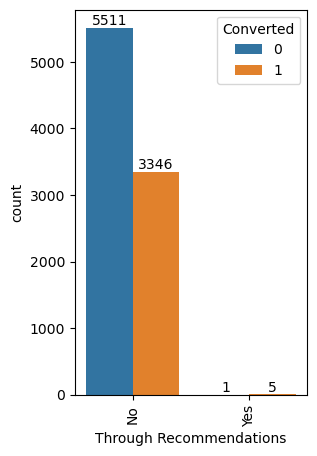

In [56]:
# Visualising the column
plt.figure(figsize=(3,5))
ax = sns.countplot(data=lead_data, x='Through Recommendations', hue='Converted')
plt.xticks(rotation= 90)
for label in ax.containers:
    ax.bar_label(label)
plt.show()

- The leads generated through recommendations are 6, out of which 5 were converted.

#### 'Receive More Updates About Our Courses' column

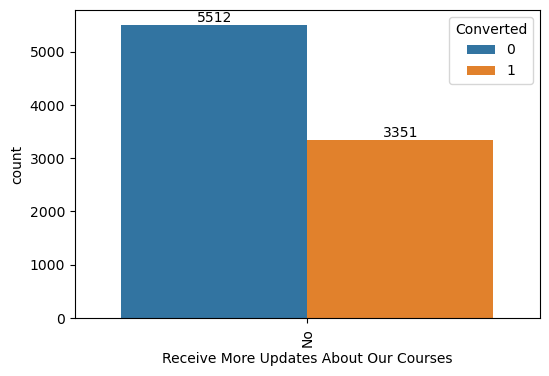

In [57]:
# Visualising the column
plt.figure(figsize=(6,4))
ax = sns.countplot(data=lead_data, x='Receive More Updates About Our Courses', hue='Converted')
plt.xticks(rotation= 90)
for label in ax.containers:
    ax.bar_label(label)
plt.show()

From above graph, it can be seen that this column has only one option, hence it is safe to drop this column.

In [58]:
# Dropping the 'Receive More Updates About Our Courses' column
lead_data = lead_data.drop('Receive More Updates About Our Courses', axis=1)

#### 'Update me on Supply Chain Content' column

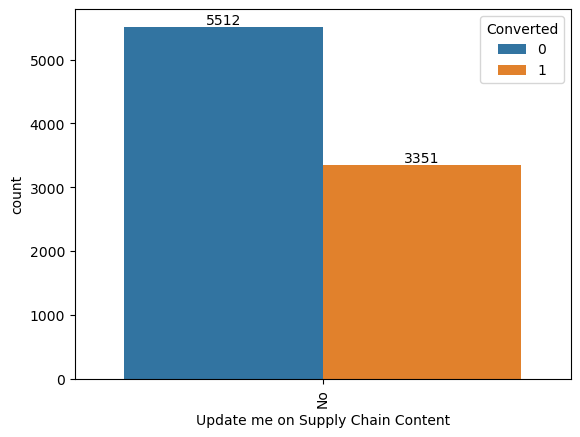

In [59]:
# Visualising the column
ax = sns.countplot(data=lead_data, x='Update me on Supply Chain Content', hue='Converted')
plt.xticks(rotation= 90)
for label in ax.containers:
    ax.bar_label(label)
plt.show()

From above graph, it can be seen that this column has only one option, hence it is safe to drop this column.

In [60]:
# Dropping the 'Update me on Supply Chain Content' column
lead_data = lead_data.drop('Update me on Supply Chain Content', axis=1)

#### 'Get updates on DM Content' column

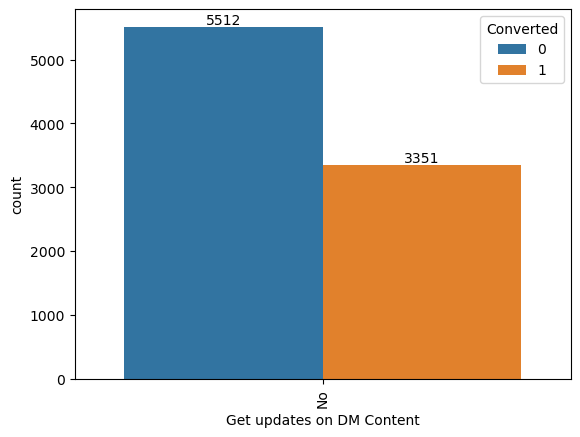

In [61]:
# Visualising the column
ax = sns.countplot(data=lead_data, x='Get updates on DM Content', hue='Converted')
plt.xticks(rotation= 90)
for label in ax.containers:
    ax.bar_label(label)
plt.show()

From above graph, it can be seen that this column has only one option, hence it is safe to drop this column.

In [62]:
# Dropping the 'Get updates on DM Content' column
lead_data = lead_data.drop('Get updates on DM Content', axis=1)

#### 'I agree to pay the amount through cheque' column

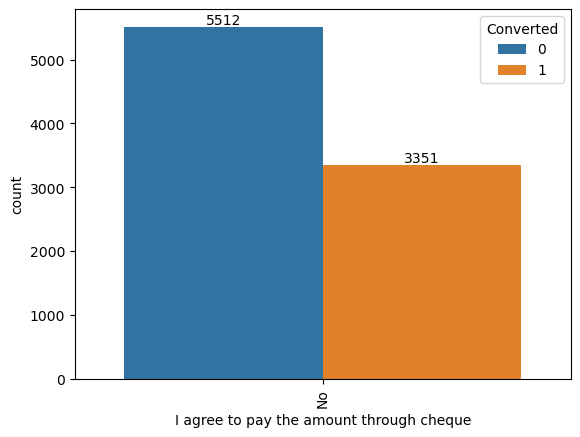

In [63]:
# Visualising the column
ax = sns.countplot(data=lead_data, x='I agree to pay the amount through cheque', hue='Converted')
plt.xticks(rotation= 90)
for label in ax.containers:
    ax.bar_label(label)
plt.show()

From above graph, it can be seen that this column has only one option, hence it is safe to drop this column.

In [64]:
# Dropping the 'I agree to pay the amount through cheque' column
lead_data = lead_data.drop('I agree to pay the amount through cheque', axis=1)

#### 'Free_copy' column

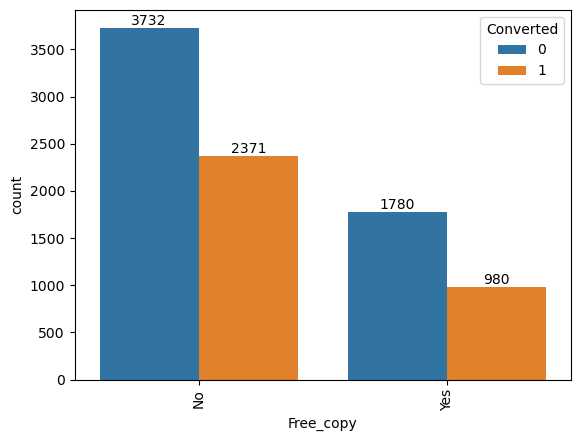

In [65]:
# Visualising the column
ax = sns.countplot(data=lead_data, x='Free_copy', hue='Converted')
plt.xticks(rotation= 90)
for label in ax.containers:
    ax.bar_label(label)
plt.show()

The conversion rate is high for the leads who do not want a free copy of 'Mastering the Interview'.

#### 'Last Notable Activity' column

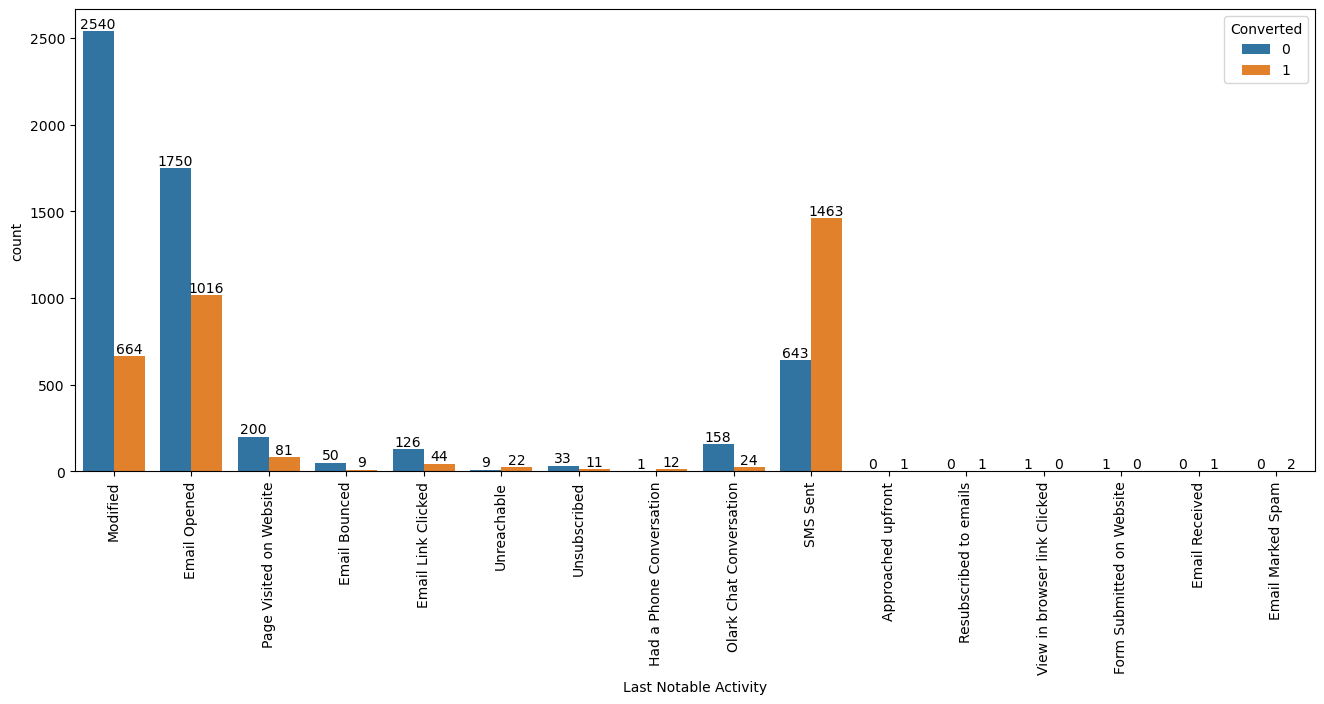

In [66]:
# Visualising the column
plt.figure(figsize=(16,6))
ax = sns.countplot(data=lead_data, x='Last Notable Activity', hue='Converted')
plt.xticks(rotation= 90)
for label in ax.containers:
    ax.bar_label(label)
plt.show()

Lead conversion rate is very high where the last notable activity is 'SMS Sent'

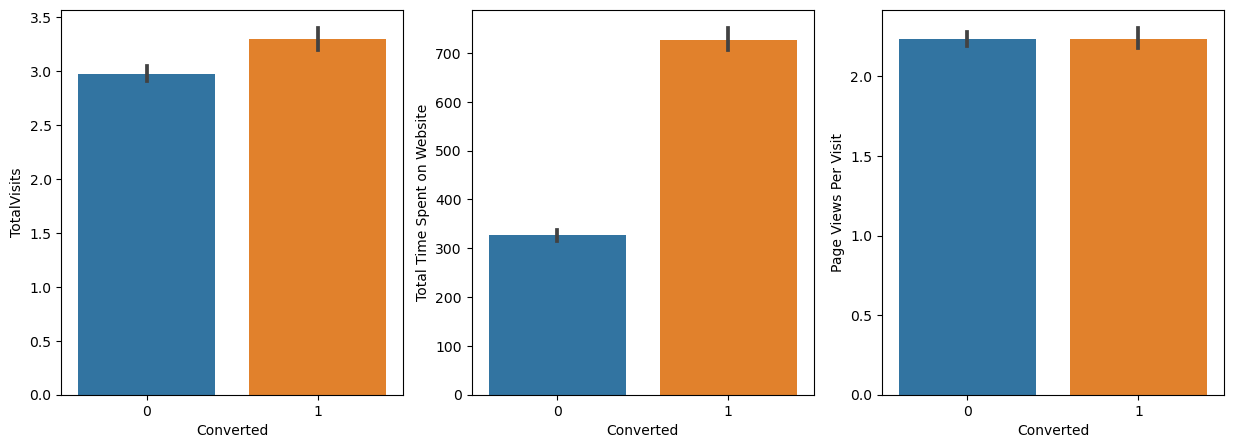

In [67]:
# Visualising all the numerical columns with Converted column

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.barplot(y = 'TotalVisits', x='Converted', data = lead_data)
plt.subplot(1,3,2)
sns.barplot(y = 'Total Time Spent on Website', x='Converted', data = lead_data)
plt.subplot(1,3,3)
sns.barplot(y = 'Page Views Per Visit', x='Converted', data = lead_data)
plt.show()

<b>EDA conclusion</b>

Based on the analysis done, it is seen that there are columns which are not adding any information to the model, hence dropping the column for better analysis purpose.

### Bivariate Analysis for Numerical Variables

<Figure size 1600x400 with 0 Axes>

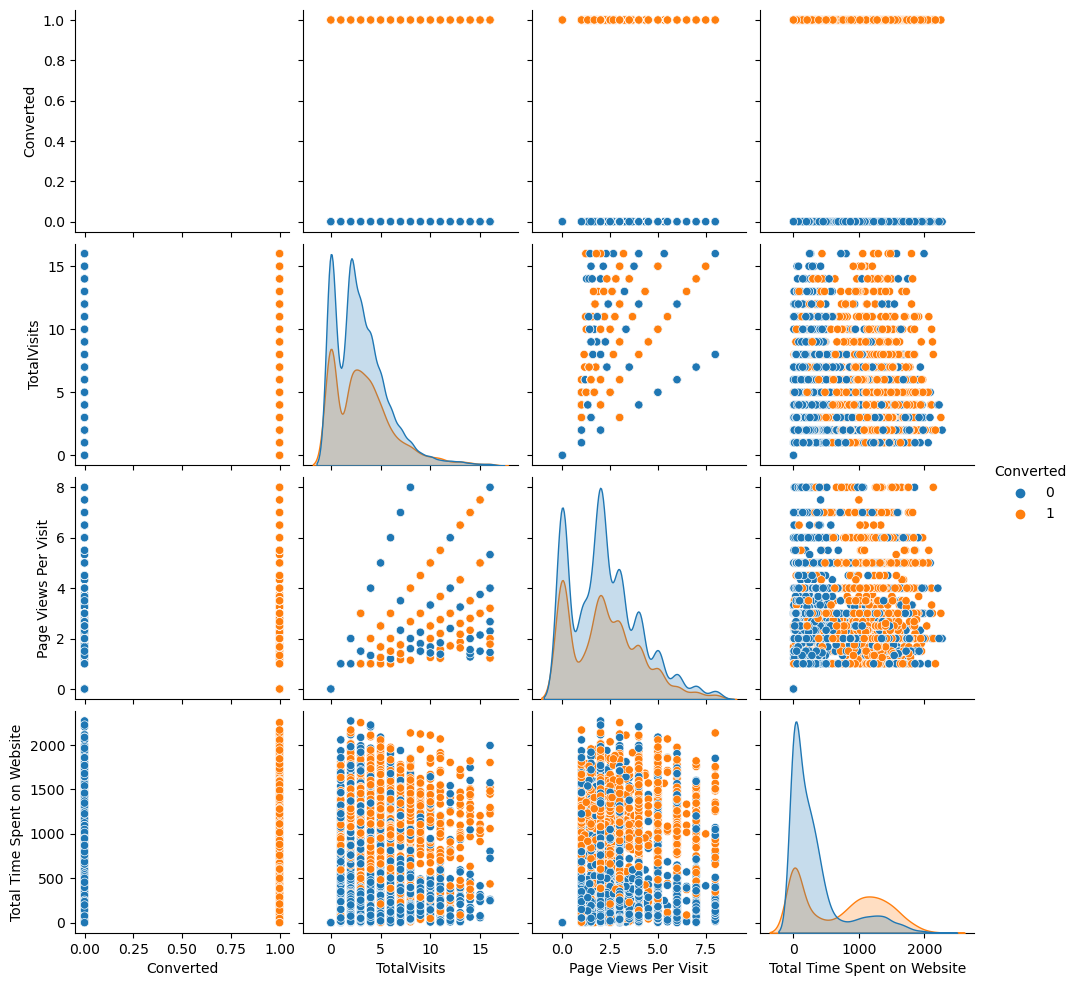

In [68]:
num_cols =["Converted",'TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']
plt.figure(figsize=(16, 4))
sns.pairplot(data=lead_data,vars=num_cols,hue="Converted"); 

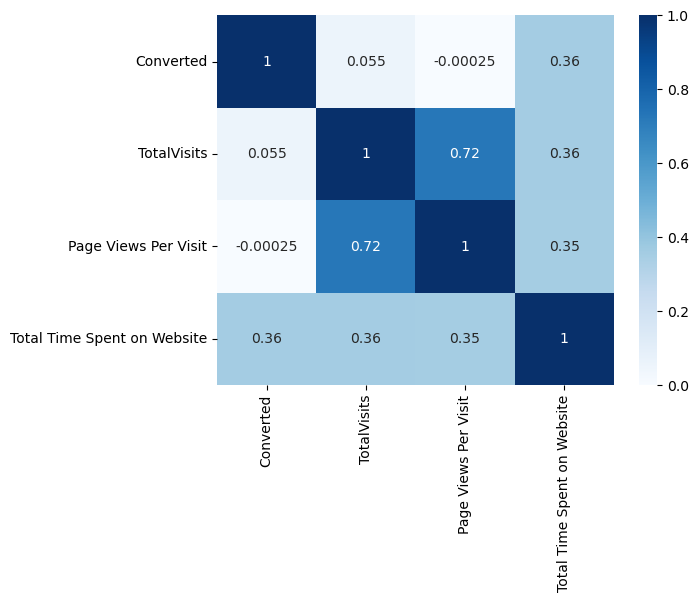

In [69]:
# Heatmap to show correlation between numerical variables

sns.heatmap(data=lead_data[num_cols].corr(),cmap="Blues",annot=True)
plt.show()

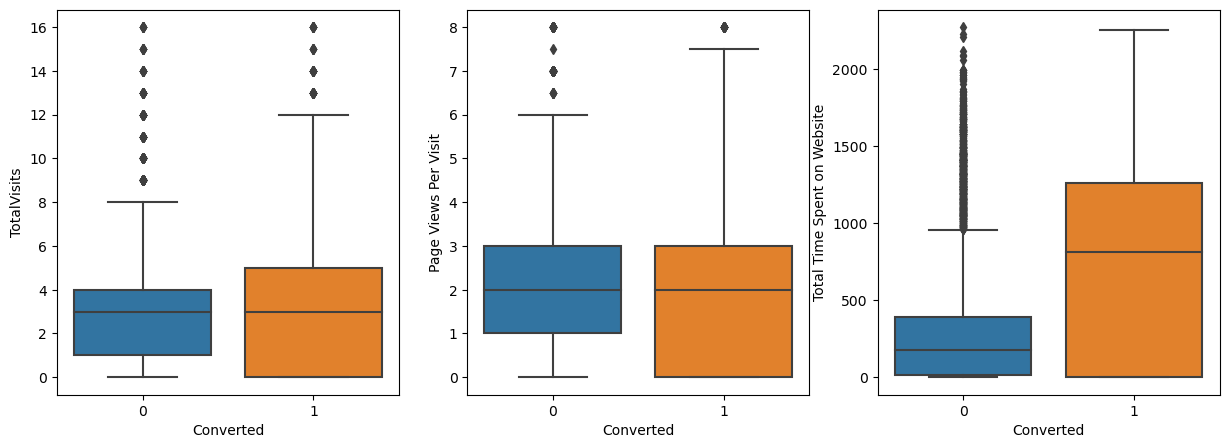

In [70]:
# Boxplot with Converted as hue

plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead_data)
plt.subplot(1,3,2)
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = lead_data)
plt.subplot(1,3,3)
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = lead_data)
plt.show()

- Past Leads who spends more time on Website are successfully converted than those who spends less as seen in the boxplot

In [71]:
# Dropping the columns which are not necessary for model
lead_data = lead_data.drop(columns=['Prospect ID','Lead Number','Last Notable Activity'], axis=1)

In [72]:
# Checking info of the data
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8863 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Lead Origin                  8863 non-null   object 
 1   Lead Source                  8863 non-null   object 
 2   Do Not Email                 8863 non-null   object 
 3   Do Not Call                  8863 non-null   object 
 4   Converted                    8863 non-null   int64  
 5   TotalVisits                  8863 non-null   float64
 6   Total Time Spent on Website  8863 non-null   int64  
 7   Page Views Per Visit         8863 non-null   float64
 8   Last Activity                8863 non-null   object 
 9   Current_occupation           8863 non-null   object 
 10  Search                       8863 non-null   object 
 11  Digital Advertisement        8863 non-null   object 
 12  Through Recommendations      8863 non-null   object 
 13  Free_copy         

In [73]:
# Checking the head of the data again
lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Current_occupation,Search,Digital Advertisement,Through Recommendations,Free_copy
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,No,No,No,No
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Unemployed,No,No,No,No
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Student,No,No,No,Yes
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Others,Unemployed,No,No,No,No
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,No,No,No,No


## Step 4: Data Preparation

### Converting some binary variables (Yes/No) to 0/1

In [74]:
# List of variables to map
varlist = ['Do Not Email', 'Do Not Call', 'Search', 'Digital Advertisement', 'Through Recommendations', 'Free_copy']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, 'No': 0})

# Applying the function to the lead_data
lead_data[varlist] = lead_data[varlist].apply(binary_map)

In [75]:
# Checking the head again
lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Current_occupation,Search,Digital Advertisement,Through Recommendations,Free_copy
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Unemployed,0,0,0,0
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Unemployed,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Student,0,0,0,1
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Others,Unemployed,0,0,0,0
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Unemployed,0,0,0,0


### Creating dummy variables for categorical variables
'Lead Origin', 'Lead Source', 'Last Activity', 'Current_occupation'.

In [76]:
# Creating a dummy variable for the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(lead_data[['Lead Origin', 'Lead Source', 'Last Activity', 'Current_occupation']], drop_first=True)

# Checking the head of the dummy1 data
dummy1.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Current_occupation_Housewife,Current_occupation_No Information,Current_occupation_Other,Current_occupation_Student,Current_occupation_Unemployed,Current_occupation_Working Professional
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [77]:
# Merging the lead_data to dummy1
lead_data = pd.concat([lead_data, dummy1], axis=1)

lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Current_occupation,Search,Digital Advertisement,Through Recommendations,Free_copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Current_occupation_Housewife,Current_occupation_No Information,Current_occupation_Other,Current_occupation_Student,Current_occupation_Unemployed,Current_occupation_Working Professional
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Unemployed,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Unemployed,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Student,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Others,Unemployed,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Unemployed,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [78]:
# Dropping the columns for which dummy variables are created
lead_data = lead_data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Current_occupation'], axis=1)

lead_data.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,Free_copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Current_occupation_Housewife,Current_occupation_No Information,Current_occupation_Other,Current_occupation_Student,Current_occupation_Unemployed,Current_occupation_Working Professional
0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,0,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,2.0,1532,2.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,1.0,305,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,0,0,1,2.0,1428,1.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


### Train-Test Split

In [79]:
# Importing required libraries
from sklearn.model_selection import train_test_split

# Putting fearute variable to X
X = lead_data.drop('Converted', axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,Free_copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Current_occupation_Housewife,Current_occupation_No Information,Current_occupation_Other,Current_occupation_Student,Current_occupation_Unemployed,Current_occupation_Working Professional
0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,0,0,2.0,1532,2.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1.0,305,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,0,0,2.0,1428,1.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [80]:
# Putting the target variable to y
y = lead_data['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [81]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling

In [82]:
# Importing required libraries
from sklearn.preprocessing import StandardScaler

In [83]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website',
                                                                                                              'Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,Free_copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Current_occupation_Housewife,Current_occupation_No Information,Current_occupation_Other,Current_occupation_Student,Current_occupation_Unemployed,Current_occupation_Working Professional
5425,0,0,-0.024078,-0.617232,0.421959,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
8586,1,0,0.335002,-0.241036,0.967428,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4631,0,0,0.694082,-0.224520,0.149225,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4464,0,0,-0.024078,-0.536488,-0.396244,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2058,0,0,1.412241,-0.602552,-0.450791,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [84]:
# Checking the lead conversion rate
conversion_rate = (sum(lead_data['Converted'])/len(lead_data['Converted'].index))*100
conversion_rate

37.80886832900824

As per the given data, the lead conversion rate is around 38%.

In [85]:
lead_data.shape

(8863, 35)

## Step 5: Model Building

### Running the first training model
### Model 1

In [86]:
# Importing the required labrary
import statsmodels.api as sm

In [87]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6204
Model:                            GLM   Df Residuals:                     6169
Model Family:                Binomial   Df Model:                           34
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2464.4
Date:                Mon, 17 Jul 2023   Deviance:                       4928.8
Time:                        19:33:23   Pearson chi2:                 6.32e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4120
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.1512      1.360     -0.111      0.911      -2.817       2.514
Do Not Email                               -1.1538      0.204     -5.647      0.000      -1.554      -0.753
Do Not Call                                21.8039   3.13e+04      0.001      0.999   -6.14e+04    6.15e+04
TotalVisits                                 0.3621      0.054      6.729      0.000       0.257       0.468
Total Time Spent on Website                 1.1237      0.042     26.846      0.000       1.042       1.206
Page Views Per Visit                       -0.1808      0.059     -3.066      0.002      -0.296      -0.065
Search                                     -0.9865      0.906     -1.089      0.276      -2.762       0.789
Digital Advertisement                      21.8706   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Through Recommendations                     1.1231      1.915      0.586      0.558      -2.630       4.876
Free_copy                                  -0.0002      0.113     -0.001      0.999      -0.221       0.221
Lead Origin_Landing Page Submission        -0.2877      0.111     -2.589      0.010      -0.505      -0.070
Lead Origin_Lead Add Form                   1.3374      1.446      0.925      0.355      -1.497       4.172
Lead Origin_Lead Import                    22.7978   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Facebook                      -22.2657   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Lead Source_Google                          0.3289      0.119      2.753      0.006       0.095       0.563
Lead Source_Olark Chat                      1.5850      0.172      9.208      0.000       1.248       1.922
Lead Source_Organic Search                  0.0151      0.137      0.110      0.912      -0.254       0.284
Lead Source_Others                          0.8689      0.769      1.129      0.259      -0.639       2.377
Lead Source_Reference                       2.3939      1.463      1.636      0.102      -0.474       5.261
Lead Source_Referral Sites                 -0.2667      0.380     -0.702      0.483      -1.011       0.478
Lead Source_Welingak Website                5.0474      1.766      2.858      0.004       1.586       8.509
Last Activity_Email Bounced                 0.1656      0.422      0.393      0.695      -0.661       0.992
Last Activity_Email Link Clicked            0.4690      0.293      1.602      0.109      -0.105       1.043
Last Activity_Email Opened                  0.9358      0.208      4.499      0.000       0.528       1.343
Last Activity_Form Submitted on Website     0.1125      0.402      0.280      0.780      -0.676       0.901
Last Activity_Olark Chat Conversation      -0.5355      0.2

## Step 6: Feature Selection using RFE

In [88]:
# Importing required library
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [89]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg,n_features_to_select= 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [90]:
# This show for each feature whether the feature is in top 20(the no of features)
rfe.support_

array([ True,  True, False,  True, False, False, False,  True, False,
        True,  True, False, False,  True,  True, False,  True,  True,
       False,  True, False, False,  True, False,  True,  True, False,
        True,  True,  True, False,  True,  True,  True])

In [91]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', True, 1),
 ('TotalVisits', False, 5),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 9),
 ('Search', False, 3),
 ('Digital Advertisement', False, 6),
 ('Through Recommendations', True, 1),
 ('Free_copy', False, 13),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 4),
 ('Lead Source_Facebook', False, 12),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 14),
 ('Lead Source_Others', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 2),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 15),
 ('Last Activity_Email Link Clicked', False, 7),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 11),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Oth

In [92]:
# Checking the variables selected by RFE
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Do Not Call', 'Total Time Spent on Website',
       'Through Recommendations', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Current_occupation_Housewife',
       'Current_occupation_No Information', 'Current_occupation_Student',
       'Current_occupation_Unemployed',
       'Current_occupation_Working Professional'],
      dtype='object')

### Rebuilding the model with Statsmodel - Model 2

In [93]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6204
Model:                            GLM   Df Residuals:                     6183
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2494.6
Date:                Mon, 17 Jul 2023   Deviance:                       4989.2
Time:                        19:33:25   Pearson chi2:                 6.28e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4062
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.3663      0.701     -0.523      0.601      -1.740       1.007
Do Not Email                               -1.2034      0.181     -6.633      0.000      -1.559      -0.848
Do Not Call                                21.9488   3.26e+04      0.001      0.999    -6.4e+04     6.4e+04
Total Time Spent on Website                 1.1355      0.041     27.421      0.000       1.054       1.217
Through Recommendations                     1.0096      1.568      0.644      0.520      -2.063       4.082
Lead Origin_Landing Page Submission        -0.2745      0.094     -2.928      0.003      -0.458      -0.091
Lead Origin_Lead Add Form                   1.2876      1.413      0.912      0.362      -1.481       4.056
Lead Source_Google                          0.3226      0.084      3.859      0.000       0.159       0.486
Lead Source_Olark Chat                      1.3996      0.135     10.394      0.000       1.136       1.664
Lead Source_Others                          0.8385      0.767      1.094      0.274      -0.664       2.341
Lead Source_Reference                       2.2526      1.429      1.577      0.115      -0.547       5.053
Lead Source_Welingak Website                4.8886      1.737      2.814      0.005       1.484       8.294
Last Activity_Email Opened                  0.6474      0.110      5.880      0.000       0.432       0.863
Last Activity_Olark Chat Conversation      -0.8158      0.187     -4.355      0.000      -1.183      -0.449
Last Activity_Others                        1.2130      0.260      4.672      0.000       0.704       1.722
Last Activity_SMS Sent                      1.8038      0.112     16.115      0.000       1.584       2.023
Current_occupation_Housewife               21.8704   1.69e+04      0.001      0.999   -3.31e+04    3.31e+04
Current_occupation_No Information          -2.5640      0.698     -3.675      0.000      -3.931      -1.197
Current_occupation_Student                 -1.2197      0.724     -1.684      0.092      -2.639       0.199
Current_occupation_Unemployed              -1.2875      0.694     -1.855      0.064      -2.648       0.073
Current_occupation_Working Professional     1.2221      0.717      1.704      0.088      -0.183       2.628
===========================================================================================================
"""

Removing the column 'Do Not Call' as it has very high p-value.

In [94]:
# Dropping the column 'Do Not Call'
col = col.drop('Do Not Call', 1)

### Rebuilding the model with Statsmodel - Model 3

In [95]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6204
Model:                            GLM   Df Residuals:                     6184
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2495.5
Date:                Mon, 17 Jul 2023   Deviance:                       4991.0
Time:                        19:33:25   Pearson chi2:                 6.29e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4061
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.3663      0.701     -0.523      0.601      -1.740       1.008
Do Not Email                               -1.2043      0.182     -6.634      0.000      -1.560      -0.849
Total Time Spent on Website                 1.1358      0.041     27.435      0.000       1.055       1.217
Through Recommendations                     1.0103      1.567      0.645      0.519      -2.062       4.082
Lead Origin_Landing Page Submission        -0.2748      0.094     -2.932      0.003      -0.459      -0.091
Lead Origin_Lead Add Form                   1.2873      1.413      0.911      0.362      -1.481       4.056
Lead Source_Google                          0.3229      0.084      3.864      0.000       0.159       0.487
Lead Source_Olark Chat                      1.3978      0.135     10.384      0.000       1.134       1.662
Lead Source_Others                          0.8387      0.767      1.094      0.274      -0.664       2.341
Lead Source_Reference                       2.2757      1.429      1.593      0.111      -0.524       5.076
Lead Source_Welingak Website                4.8884      1.737      2.814      0.005       1.484       8.293
Last Activity_Email Opened                  0.6478      0.110      5.883      0.000       0.432       0.864
Last Activity_Olark Chat Conversation      -0.8033      0.186     -4.308      0.000      -1.169      -0.438
Last Activity_Others                        1.2131      0.260      4.671      0.000       0.704       1.722
Last Activity_SMS Sent                      1.8037      0.112     16.110      0.000       1.584       2.023
Current_occupation_Housewife               21.8681   1.69e+04      0.001      0.999    -3.3e+04    3.31e+04
Current_occupation_No Information          -2.5647      0.698     -3.676      0.000      -3.932      -1.197
Current_occupation_Student                 -1.2222      0.724     -1.688      0.091      -2.641       0.197
Current_occupation_Unemployed              -1.2874      0.694     -1.855      0.064      -2.648       0.073
Current_occupation_Working Professional     1.2207      0.717      1.702      0.089      -0.185       2.626
===========================================================================================================
"""

Removing the column 'Current_occupation_Housewife' as it has very high p-value.

In [96]:
# Dropping the column 'Current_occupation_Housewife'
col = col.drop('Current_occupation_Housewife', 1)

### Rebuilding the model with Statsmodel - Model 4

In [97]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6204
Model:                            GLM   Df Residuals:                     6185
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2497.4
Date:                Mon, 17 Jul 2023   Deviance:                       4994.9
Time:                        19:33:25   Pearson chi2:                 6.30e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4057
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       0.2487      0.643      0.387      0.699      -1.012       1.509
Do Not Email                               -1.2079      0.182     -6.646      0.000      -1.564      -0.852
Total Time Spent on Website                 1.1344      0.041     27.418      0.000       1.053       1.216
Through Recommendations                     1.0092      1.567      0.644      0.520      -2.062       4.081
Lead Origin_Landing Page Submission        -0.2722      0.094     -2.904      0.004      -0.456      -0.089
Lead Origin_Lead Add Form                   1.2898      1.412      0.913      0.361      -1.478       4.058
Lead Source_Google                          0.3245      0.084      3.885      0.000       0.161       0.488
Lead Source_Olark Chat                      1.3977      0.135     10.384      0.000       1.134       1.662
Lead Source_Others                          0.8379      0.766      1.093      0.274      -0.664       2.340
Lead Source_Reference                       2.2784      1.428      1.595      0.111      -0.521       5.078
Lead Source_Welingak Website                4.8872      1.737      2.814      0.005       1.483       8.292
Last Activity_Email Opened                  0.6481      0.110      5.891      0.000       0.432       0.864
Last Activity_Olark Chat Conversation      -0.8021      0.186     -4.303      0.000      -1.167      -0.437
Last Activity_Others                        1.2123      0.260      4.665      0.000       0.703       1.722
Last Activity_SMS Sent                      1.8037      0.112     16.117      0.000       1.584       2.023
Current_occupation_No Information          -3.1812      0.640     -4.970      0.000      -4.436      -1.927
Current_occupation_Student                 -1.8394      0.668     -2.752      0.006      -3.150      -0.529
Current_occupation_Unemployed              -1.9045      0.636     -2.994      0.003      -3.151      -0.658
Current_occupation_Working Professional     0.6032      0.661      0.913      0.361      -0.692       1.898
===========================================================================================================
"""

Removing the column 'Through Recommendations' as it has very high p-value.

In [98]:
# Dropping the column 'Through Recommendations'
col = col.drop('Through Recommendations', 1)

### Rebuilding the model with Statsmodel - Model 5

In [99]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6204
Model:                            GLM   Df Residuals:                     6186
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2497.7
Date:                Mon, 17 Jul 2023   Deviance:                       4995.3
Time:                        19:33:25   Pearson chi2:                 6.31e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4057
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       0.2487      0.643      0.387      0.699      -1.011       1.509
Do Not Email                               -1.2086      0.182     -6.650      0.000      -1.565      -0.852
Total Time Spent on Website                 1.1340      0.041     27.413      0.000       1.053       1.215
Lead Origin_Landing Page Submission        -0.2715      0.094     -2.898      0.004      -0.455      -0.088
Lead Origin_Lead Add Form                   1.2904      1.412      0.914      0.361      -1.478       4.058
Lead Source_Google                          0.3233      0.084      3.871      0.000       0.160       0.487
Lead Source_Olark Chat                      1.3965      0.135     10.376      0.000       1.133       1.660
Lead Source_Others                          0.8364      0.766      1.091      0.275      -0.666       2.339
Lead Source_Reference                       2.2762      1.428      1.594      0.111      -0.523       5.076
Lead Source_Welingak Website                4.8856      1.737      2.813      0.005       1.481       8.290
Last Activity_Email Opened                  0.6482      0.110      5.894      0.000       0.433       0.864
Last Activity_Olark Chat Conversation      -0.8025      0.186     -4.305      0.000      -1.168      -0.437
Last Activity_Others                        1.2113      0.260      4.661      0.000       0.702       1.721
Last Activity_SMS Sent                      1.8027      0.112     16.114      0.000       1.583       2.022
Current_occupation_No Information          -3.1802      0.640     -4.969      0.000      -4.435      -1.926
Current_occupation_Student                 -1.8388      0.668     -2.751      0.006      -3.149      -0.529
Current_occupation_Unemployed              -1.9035      0.636     -2.993      0.003      -3.150      -0.657
Current_occupation_Working Professional     0.6143      0.660      0.930      0.352      -0.680       1.909
===========================================================================================================
"""

Removing the column 'Lead Origin_Lead Add Form' as it has very high p-value.

In [100]:
# Dropping the column 'Lead Origin_Lead Add Form'
col = col.drop('Lead Origin_Lead Add Form', 1)

### Rebuilding the model with Statsmodel - Model 6

In [101]:
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6204
Model:                            GLM   Df Residuals:                     6187
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2498.1
Date:                Mon, 17 Jul 2023   Deviance:                       4996.2
Time:                        19:33:25   Pearson chi2:                 6.31e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4056
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       0.2545      0.643      0.396      0.692      -1.006       1.515
Do Not Email                               -1.2099      0.182     -6.658      0.000      -1.566      -0.854
Total Time Spent on Website                 1.1345      0.041     27.434      0.000       1.053       1.216
Lead Origin_Landing Page Submission        -0.2774      0.093     -2.968      0.003      -0.461      -0.094
Lead Source_Google                          0.3222      0.084      3.858      0.000       0.158       0.486
Lead Source_Olark Chat                      1.3933      0.134     10.363      0.000       1.130       1.657
Lead Source_Others                          1.2191      0.608      2.005      0.045       0.027       2.411
Lead Source_Reference                       3.5621      0.243     14.686      0.000       3.087       4.037
Lead Source_Welingak Website                6.1716      1.018      6.065      0.000       4.177       8.166
Last Activity_Email Opened                  0.6470      0.110      5.888      0.000       0.432       0.862
Last Activity_Olark Chat Conversation      -0.8045      0.186     -4.317      0.000      -1.170      -0.439
Last Activity_Others                        1.2110      0.260      4.660      0.000       0.702       1.720
Last Activity_SMS Sent                      1.8027      0.112     16.122      0.000       1.584       2.022
Current_occupation_No Information          -3.1826      0.640     -4.973      0.000      -4.437      -1.928
Current_occupation_Student                 -1.8390      0.668     -2.751      0.006      -3.149      -0.529
Current_occupation_Unemployed              -1.9035      0.636     -2.993      0.003      -3.150      -0.657
Current_occupation_Working Professional     0.6142      0.660      0.930      0.352      -0.680       1.909
===========================================================================================================
"""

Removing the column 'Current_occupation_Working Professional' as it has very high p-value.

In [102]:
# Dropping the column 'Current_occupation_Working Professional'
col = col.drop('Current_occupation_Working Professional', 1)

### Rebuilding the model with Statsmodel - Model 7

In [103]:
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6204
Model:                            GLM   Df Residuals:                     6188
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2498.5
Date:                Mon, 17 Jul 2023   Deviance:                       4997.0
Time:                        19:33:25   Pearson chi2:                 6.31e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4055
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.8234      0.214      3.856      0.000       0.405       1.242
Do Not Email                             -1.2100      0.182     -6.655      0.000      -1.566      -0.854
Total Time Spent on Website               1.1343      0.041     27.428      0.000       1.053       1.215
Lead Origin_Landing Page Submission      -0.2774      0.093     -2.967      0.003      -0.461      -0.094
Lead Source_Google                        0.3242      0.083      3.884      0.000       0.161       0.488
Lead Source_Olark Chat                    1.3945      0.134     10.372      0.000       1.131       1.658
Lead Source_Others                        1.2207      0.608      2.008      0.045       0.029       2.412
Lead Source_Reference                     3.5636      0.243     14.693      0.000       3.088       4.039
Lead Source_Welingak Website              6.1725      1.018      6.066      0.000       4.178       8.167
Last Activity_Email Opened                0.6478      0.110      5.894      0.000       0.432       0.863
Last Activity_Olark Chat Conversation    -0.8017      0.186     -4.305      0.000      -1.167      -0.437
Last Activity_Others                      1.2141      0.260      4.674      0.000       0.705       1.723
Last Activity_SMS Sent                    1.8055      0.112     16.151      0.000       1.586       2.025
Current_occupation_No Information        -3.7543      0.196    -19.186      0.000      -4.138      -3.371
Current_occupation_Student               -2.4101      0.276     -8.728      0.000      -2.951      -1.869
Current_occupation_Unemployed            -2.4751      0.183    -13.559      0.000      -2.833      -2.117
=========================================================================================================
"""

Removing the column 'Lead Source_Others' as it has very high p-value.

In [104]:
# Dropping the column 'Lead Source_Others'
col = col.drop('Lead Source_Others', 1)

### Rebuilding the model with Statsmodel - Model 8

In [105]:
X_train_sm = sm.add_constant(X_train[col])
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6204
Model:                            GLM   Df Residuals:                     6189
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2500.4
Date:                Mon, 17 Jul 2023   Deviance:                       5000.8
Time:                        19:33:25   Pearson chi2:                 6.30e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4051
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.8343      0.213      3.909      0.000       0.416       1.253
Do Not Email                             -1.2117      0.182     -6.666      0.000      -1.568      -0.855
Total Time Spent on Website               1.1323      0.041     27.409      0.000       1.051       1.213
Lead Origin_Landing Page Submission      -0.2817      0.093     -3.017      0.003      -0.465      -0.099
Lead Source_Google                        0.3145      0.083      3.778      0.000       0.151       0.478
Lead Source_Olark Chat                    1.3799      0.134     10.290      0.000       1.117       1.643
Lead Source_Reference                     3.5492      0.242     14.645      0.000       3.074       4.024
Lead Source_Welingak Website              6.1576      1.018      6.051      0.000       4.163       8.152
Last Activity_Email Opened                0.6465      0.110      5.884      0.000       0.431       0.862
Last Activity_Olark Chat Conversation    -0.8058      0.186     -4.329      0.000      -1.171      -0.441
Last Activity_Others                      1.2082      0.260      4.654      0.000       0.699       1.717
Last Activity_SMS Sent                    1.8006      0.112     16.122      0.000       1.582       2.019
Current_occupation_No Information        -3.7484      0.196    -19.167      0.000      -4.132      -3.365
Current_occupation_Student               -2.4093      0.276     -8.728      0.000      -2.950      -1.868
Current_occupation_Unemployed            -2.4699      0.182    -13.537      0.000      -2.827      -2.112
=========================================================================================================
"""

Since the Model 8 seems to be stable with significant p-values, we shall go ahead with this model for further analysis

In [106]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5425    0.877476
8586    0.009189
4631    0.229603
4464    0.468050
2058    0.037990
1719    0.204088
2286    0.645035
1433    0.304362
5550    0.034354
8333    0.213338
dtype: float64

In [107]:
# Reshaping
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.87747599, 0.00918918, 0.22960347, 0.46805009, 0.03798993,
       0.20408779, 0.64503488, 0.30436173, 0.03435373, 0.21333846])

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [108]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,1,0.877476,5425
1,0,0.009189,8586
2,0,0.229603,4631
3,0,0.468050,4464
4,0,0.037990,2058


##### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [109]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted
0,1,0.877476,5425,1
1,0,0.009189,8586,0
2,0,0.229603,4631,0
3,0,0.468050,4464,0
4,0,0.037990,2058,0


##### Checking Confusion metrics and accuracy

In [110]:
from sklearn import metrics

In [111]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3437  426]
 [ 697 1644]]


In [112]:
# Predicted     not_churn    churn
# Actual
# not_churn        3437      426
# churn            697       1644  

In [113]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8189877498388136


Accuracy rate of this model is around 82%, which is great. But we need to calculate other metrics as well because we cannot depend only on Accuracy Score

#### Checking VIFs

In [114]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [115]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,Current_occupation_Unemployed,4.46
2,Lead Origin_Landing Page Submission,3.18
11,Current_occupation_No Information,2.89
7,Last Activity_Email Opened,2.74
4,Lead Source_Olark Chat,2.49
10,Last Activity_SMS Sent,2.38
8,Last Activity_Olark Chat Conversation,1.81
3,Lead Source_Google,1.74
1,Total Time Spent on Website,1.31
5,Lead Source_Reference,1.30


Now all the variables have a good value of VIF and p-values are also significant. So we don't have to drop any more variables and we can proceed with making predictions using this model only.

In [116]:
# Again getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5425    0.877476
8586    0.009189
4631    0.229603
4464    0.468050
2058    0.037990
1719    0.204088
2286    0.645035
1433    0.304362
5550    0.034354
8333    0.213338
dtype: float64

In [117]:
# Reshaping
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.87747599, 0.00918918, 0.22960347, 0.46805009, 0.03798993,
       0.20408779, 0.64503488, 0.30436173, 0.03435373, 0.21333846])

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [118]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted
0,1,0.877476,5425,1
1,0,0.009189,8586,0
2,0,0.229603,4631,0
3,0,0.468050,4464,0
4,0,0.037990,2058,0


##### Checking Confusion metrics and accuracy

In [119]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3437  426]
 [ 697 1644]]


In [120]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8189877498388136


The accuracy is still practically the same.

## Metrics beyond simply accuracy

In [121]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [122]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.702263989747971

In [123]:
# Let us calculate specificity
TN / float(TN+FP)

0.8897230132021745

In [124]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.11027698679782552


In [125]:
# positive predictive value 
print (TP / float(TP+FP))

0.7942028985507247


In [126]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8313981615868409


The model's specificity was good (around 89%), but the sensitivity was only 70%. Hence, this needed to be taken care of.

We have got sensitivity of 70% and this was mainly because of the cut-off point of 0.5 that we had arbitrarily chosen. Now, this cut-off point had to be optimised in order to get a decent value of sensitivity and for this we will use the ROC curve.

## Step 7: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [127]:
# Defining a function to draw ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [128]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

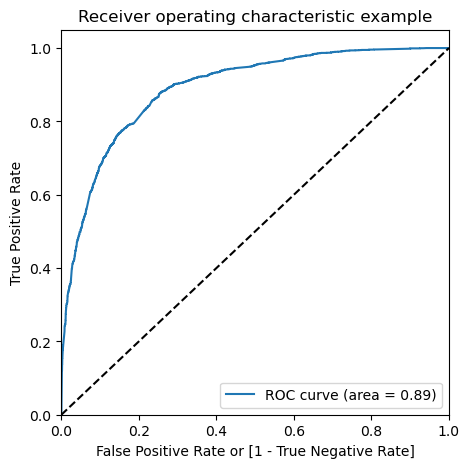

In [129]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

Since the model has 0.89 area under the curve, it is a good model.

## Step 8: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [130]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.877476,5425,1,1,1,1,1,1,1,1,1,1,0
1,0,0.009189,8586,0,1,0,0,0,0,0,0,0,0,0
2,0,0.229603,4631,0,1,1,1,0,0,0,0,0,0,0
3,0,0.468050,4464,0,1,1,1,1,1,0,0,0,0,0
4,0,0.037990,2058,0,1,0,0,0,0,0,0,0,0,0


In [131]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.377337  1.000000  0.000000
0.1   0.1  0.615571  0.973516  0.398654
0.2   0.2  0.761283  0.912431  0.669687
0.3   0.3  0.794810  0.866724  0.751230
0.4   0.4  0.819149  0.768475  0.849858
0.5   0.5  0.818988  0.702264  0.889723
0.6   0.6  0.808511  0.633063  0.914833
0.7   0.7  0.783849  0.514310  0.947191
0.8   0.8  0.763056  0.427595  0.966347
0.9   0.9  0.720019  0.276805  0.988610


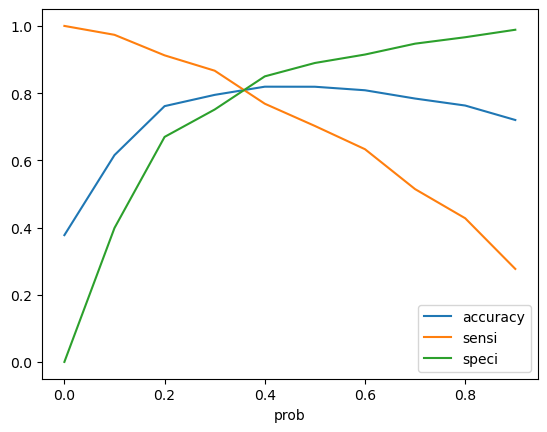

In [132]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

In [133]:
# Let us make the final prediction using 0.35 as the cut off

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.877476,5425,1,1,1,1,1,1,1,1,1,1,0,1
1,0,0.009189,8586,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.229603,4631,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.468050,4464,0,1,1,1,1,1,0,0,0,0,0,1
4,0,0.037990,2058,0,1,0,0,0,0,0,0,0,0,0,0


In [134]:
# Now let us calculate the lead score

y_train_pred_final['lead_score'] = y_train_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_train_pred_final.head(10)

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,lead_score
0,1,0.877476,5425,1,1,1,1,1,1,1,1,1,1,0,1,88
1,0,0.009189,8586,0,1,0,0,0,0,0,0,0,0,0,0,1
2,0,0.229603,4631,0,1,1,1,0,0,0,0,0,0,0,0,23
3,0,0.468050,4464,0,1,1,1,1,1,0,0,0,0,0,1,47
4,0,0.037990,2058,0,1,0,0,0,0,0,0,0,0,0,0,4
5,0,0.204088,1719,0,1,1,1,0,0,0,0,0,0,0,0,20
6,1,0.645035,2286,1,1,1,1,1,1,1,1,0,0,0,1,65
7,1,0.304362,1433,0,1,1,1,1,0,0,0,0,0,0,0,30
8,0,0.034354,5550,0,1,0,0,0,0,0,0,0,0,0,0,3
9,0,0.213338,8333,0,1,1,1,0,0,0,0,0,0,0,0,21


In [135]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8028691166989039

Since the final prediction of conversions have a target of 80% conversion as per the X Educations CEO's requirement. Hence this is a good model.

## Step 9: Model Evaluation

In [136]:
# Checking the overall Accuracy
print("Accuracy :",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Accuracy : 0.8028691166989039


In [137]:
# Confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3040,  823],
       [ 400, 1941]], dtype=int64)

In [138]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [139]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.8291328492097394


In [140]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.7869531452239192


In [141]:
# Calculate false postive rate - predicting converted lead when the lead was actually not have converted
print("False Positive rate : ",FP/ float(TN+FP))

False Positive rate :  0.21304685477608076


In [142]:
# Positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7022431259044862


In [143]:
# Negative predictive value
print("Negative Predictive Value : ",TN / float(TN+ FN))

Negative Predictive Value :  0.8837209302325582


### Metrics - Precision and Recall

In [144]:
#Looking at the confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion2

array([[3437,  426],
       [ 697, 1644]], dtype=int64)

In [145]:
# Importing the required libraries
from sklearn.metrics import precision_score, recall_score

In [146]:
# precision
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7942028985507247

In [147]:
# recall
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.702263989747971

#### Precision and recall tradeoff

In [148]:
# Importing the required library
from sklearn.metrics import precision_recall_curve

In [149]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6199    0
 6200    0
 6201    0
 6202    0
 6203    0
 Name: Converted, Length: 6204, dtype: int64,
 0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6199    0
 6200    0
 6201    1
 6202    0
 6203    0
 Name: predicted, Length: 6204, dtype: int64)

In [150]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

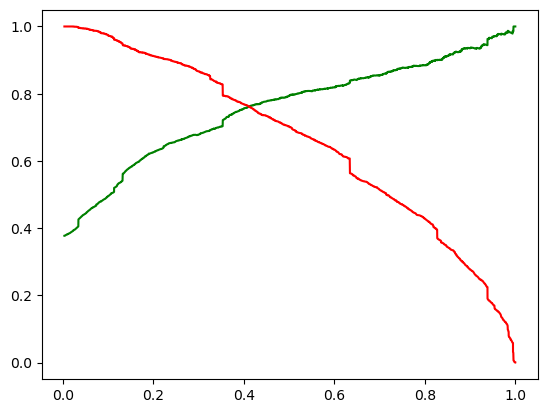

In [151]:
# plotting a trade-off curve between precision and recall
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Step 10: Making predictions on the test set

In [152]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website',
                                                                                                        'Page Views Per Visit']])

In [153]:
# Assigning the columns selected by the final model to the X_test
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Current_occupation_No Information,Current_occupation_Student,Current_occupation_Unemployed
8788,0,1.647288,1,1,0,0,0,0,0,0,1,0,0,1
7813,0,-0.402525,1,1,0,0,0,0,0,0,0,0,0,1
2403,0,1.733538,1,1,0,0,0,0,0,0,1,0,0,1
7243,0,1.203193,0,0,0,0,0,1,0,0,0,0,0,1
5363,0,2.067527,1,1,0,0,0,0,0,0,1,0,0,1


In [154]:
# Adding a const
X_test_sm = sm.add_constant(X_test)

# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

8788    0.887251
7813    0.113189
2403    0.896657
7243    0.592237
5363    0.926817
3918    0.600634
3345    0.131946
917     0.023020
7732    0.057684
1702    0.045032
dtype: float64

In [155]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [156]:
# Checking the head
y_pred_1.head()

,0
8788,0.887251
7813,0.113189
2403,0.896657
7243,0.592237
5363,0.926817


In [157]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [158]:
# Putting LeadId to index

y_test_df['Prospect ID'] = y_test_df.index

In [159]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [160]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [161]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,8788,0.887251
1,0,7813,0.113189
2,1,2403,0.896657
3,1,7243,0.592237
4,1,5363,0.926817


In [162]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [163]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_Prob'], axis=1)

In [164]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob
0,8788,0,0.887251
1,7813,0,0.113189
2,2403,1,0.896657
3,7243,1,0.592237
4,5363,1,0.926817


In [165]:
# Based on cut off threshold using accuracy, sensitivity and specificity of 0.35%
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [166]:
# Checking the head
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted
0,8788,0,0.887251,1
1,7813,0,0.113189,0
2,2403,1,0.896657,1
3,7243,1,0.592237,1
4,5363,1,0.926817,1


In [167]:
# Now let us calculate the lead score
y_pred_final['lead_score'] = y_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted,lead_score
0,8788,0,0.887251,1,89
1,7813,0,0.113189,0,11
2,2403,1,0.896657,1,90
3,7243,1,0.592237,1,59
4,5363,1,0.926817,1,93


In [168]:
# checking if 80% cases are correctly predicted based on the converted column.
# get the total of final predicted conversion or non conversion counts from the actual converted rates

checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_predicted']]
checking_test_df['final_predicted'].value_counts()

1    817
0    193
Name: final_predicted, dtype: int64

In [169]:
# checking the precentage of final_predicted conversions on test data
817/float(817+193)

0.808910891089109

Hence we can see that the final prediction of conversions have a target rate of almost 81% (Almost the same as the predictions made on training data set)

Overall Metrics - Accuracy, Confusion Metrics, Sensitivity, Specificity on test set

In [170]:
# Let's check the accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7965400526513727

In [171]:
# Confusion matrix
confusion3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion3

array([[1301,  348],
       [ 193,  817]], dtype=int64)

In [172]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [173]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.702263989747971

In [174]:
# Let us calculate specificity
TN / float(TN+FP)

0.8897230132021745

### Precision and Recall metrics for the test set

In [175]:
# precision
print('precision ',precision_score(y_pred_final.Converted, y_pred_final.final_predicted))

# recall
print('recall ',recall_score(y_pred_final.Converted, y_pred_final.final_predicted))

precision  0.7012875536480687
recall  0.808910891089109


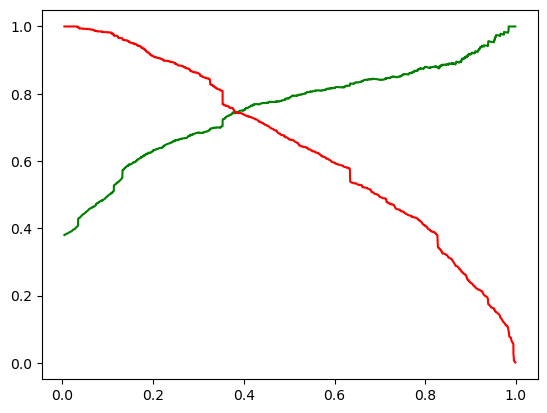

In [176]:
p, r, thresholds = precision_recall_curve(y_pred_final.Converted, y_pred_final.Converted_Prob)

# plotting a trade-off curve between precision and recall
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Observations:

After running the model on the test data, we got the following:
- Accuracy: 79.7%
- Sensitivity: 70.2%
- Specificity: 88.9%

## Results:

### Comparing the values of train and test data:

Train Data:
- Accuracy: 80.3%
- Sensitivity: 82.9%
- Specificity: 78.7%

Test Data:
- Accuracy: 79.7%
- Sensitivity: 70.2%
- Specificity: 88.9%

### Selecting the most promising leads (Hot leads)

The customers whose lead score is more than or equal to 85 can be considered as the promising leads.

In [177]:
hot_leads=y_pred_final.loc[y_pred_final["lead_score"]>=85]
hot_leads

,Prospect ID,Converted,Converted_Prob,final_predicted,lead_score
0,8788,0,0.887251,1,89
2,2403,1,0.896657,1,90
4,5363,1,0.926817,1,93
18,6423,1,0.983934,1,98
19,809,0,0.982603,1,98
...,...,...,...,...,...
2627,1568,1,0.994448,1,99
2632,6784,1,0.994807,1,99
2634,4795,1,0.851413,1,85
2640,2598,1,0.994448,1,99


<b>So there are 367 leads which can be contacted and have a high chance of getting converted.</b>

In [178]:
print("The Prospect ID of the customers which should be contacted are :")

hot_leads_ids = hot_leads["Prospect ID"].values.reshape(-1)
hot_leads_ids

The Prospect ID of the customers which should be contacted are :


array([8788, 2403, 5363, 6423,  809, 6040, 4295,   76, 2489, 1190, 7098,
       5979, 6010, 9026,  249, 7166, 4812, 5451, 4860, 4360, 7021, 7187,
       6309, 8180, 1733, 2426, 9043, 8804, 4955, 8504, 2562, 2684, 7818,
        560, 2523, 2982, 3321, 5769, 9049,  472, 7490, 3660, 8461, 2026,
       7008, 2677, 6170, 4782, 8556, 1416, 4065, 8090, 4693, 4577, 3152,
       7432, 5699, 4791, 4878,  789, 8023, 2643, 8509, 1566, 8499, 7036,
       1859, 8366, 1368,  739, 8505, 7501, 3310, 8070, 3710, 8650, 2490,
       1614, 8801, 7472, 6046, 4004, 8591, 6994,  220, 5877, 1630,  934,
       8059,  454, 7905,  262, 7817, 3078, 4705, 7009, 1770, 5276, 1573,
       6157,  718,  373, 6906,  448, 8330, 2812, 4173, 3758, 3069, 6698,
       7851, 6742, 2662, 1534, 7089, 2043, 3926, 3601, 8759, 2547,   64,
        130, 6913, 7094, 8106,  880, 1926,  818, 2124, 6005, 2907, 8959,
       5474,  561, 1360, 3917,  822, 8745, 5818, 6460, 8596, 8343, 2938,
       8412, 4466, 3055, 3976, 4123, 2101, 1203, 40

### Finding out the Important Features from our final model

In [179]:
res.params.sort_values(ascending=False)

Lead Source_Welingak Website             6.157590
Lead Source_Reference                    3.549205
Last Activity_SMS Sent                   1.800551
Lead Source_Olark Chat                   1.379876
Last Activity_Others                     1.208191
Total Time Spent on Website              1.132289
const                                    0.834266
Last Activity_Email Opened               0.646463
Lead Source_Google                       0.314539
Lead Origin_Landing Page Submission     -0.281728
Last Activity_Olark Chat Conversation   -0.805766
Do Not Email                            -1.211670
Current_occupation_Student              -2.409300
Current_occupation_Unemployed           -2.469871
Current_occupation_No Information       -3.748443
dtype: float64

## Recommendations:

- The company should make calls to the leads who spent "more time on the websites" as these are more likely to get converted.

- The company should make calls to the leads coming from the lead sources "Welingak Websites", "Reference", "Olark Chat" and "Google" as these are more likely to get converted.

- The company should make calls to the leads whose last activity was "SMS Sent", "Email Opened" and "Others" as they are more likely to get converted.

- The company should not make calls to the leads whose last activity was "Olark Chat Conversation" as they are not likely to get converted.

- The company should not make calls to the leads who chose the option of "Do not Email" as "yes" as they are not likely to get converted.

- The company should not make calls to the leads whose lead origin was "Landing Page Submission" as they are not likely to get converted.